# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.5.4-epsilon.75.125.126.130.133'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [4]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [5]:
print(data_loader.covid19dh_citation)

CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
GADM (2019), https://public.opendatasoft.com/
Geloky (2019), https://geloky.com/
I

In [6]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
159751,2020-07-20,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159752,2020-07-21,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159753,2020-07-22,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159754,2020-07-23,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159755,2020-07-24,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [7]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
159751,2020-07-20,Colombia,Vichada,2,1,0,1
159752,2020-07-21,Colombia,Vichada,2,1,0,1
159753,2020-07-22,Colombia,Vichada,2,1,0,1
159754,2020-07-23,Colombia,Vichada,2,1,0,1
159755,2020-07-24,Colombia,Vichada,2,1,0,1


In [8]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
187,2020-07-20,9579,2195,327,7057
188,2020-07-21,9816,2177,327,7312
189,2020-07-22,10054,2214,327,7513
190,2020-07-23,10420,2326,327,7767
191,2020-07-24,10420,2326,327,7767


In [9]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-20,14689933,5851587,611090,8227256,0.020800,0.280030,0.069141
2020-07-21,14926070,5908697,617224,8400149,0.020676,0.281392,0.068448
2020-07-22,15206867,6004622,624090,8578155,0.020520,0.282049,0.067819
2020-07-23,15480647,6101104,633755,8745788,0.020469,0.282475,0.067568
2020-07-24,15480749,6122235,633755,8724759,0.020469,0.281794,0.067720


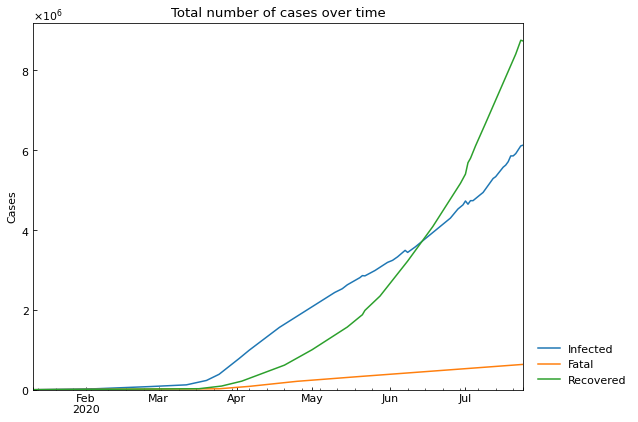

In [10]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [11]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
191,2020-07-20,25790,5052,987,19751
192,2020-07-21,26421,5284,988,20149
193,2020-07-22,27216,5582,989,20645
194,2020-07-23,28198,6178,991,21029
195,2020-07-24,28298,27307,991,20632


In [12]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [13]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
158,2020-07-18,24132,3781,985,19366
159,2020-07-19,24642,4081,985,19576
160,2020-07-20,25096,4354,985,19757
161,2020-07-21,25736,4593,988,20155
162,2020-07-22,26303,4663,989,20651


### Population in each country

In [14]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [15]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
159751,2020-07-20,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159752,2020-07-21,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159753,2020-07-22,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159754,2020-07-23,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159755,2020-07-24,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [16]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
807,CZE,Czech Republic,Plzenský kraj,584672
808,COL,Colombia,Bolívar,2070110
809,RUS,Russia,Murmansk oblast,795409
810,RUS,Russia,Republic of Crimea,1913731
811,COL,Colombia,Vichada,107808


In [17]:
population_data.value("Japan", province=None)

126529100

In [18]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [19]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [20]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
159751,2020-07-20,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159752,2020-07-21,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159753,2020-07-22,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159754,2020-07-23,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
159755,2020-07-24,2,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [21]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
159751,2020-07-20,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
159752,2020-07-21,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
159753,2020-07-22,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
159754,2020-07-23,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
159755,2020-07-24,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
191,2020-07-20,1,0,1,0,0,0,0,3,2,2,1,24.07
192,2020-07-21,1,0,1,0,0,0,0,3,2,2,1,24.07
193,2020-07-22,1,0,1,0,0,0,0,3,2,2,1,24.07
194,2020-07-23,1,0,1,0,0,0,0,3,2,2,1,24.07
195,2020-07-24,1,0,1,0,0,0,0,3,2,2,1,24.07


In [23]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
191,2020-07-20,1,0,1,0,0,0,0,3,2,2,1,24.07
192,2020-07-21,1,0,1,0,0,0,0,3,2,2,1,24.07
193,2020-07-22,1,0,1,0,0,0,0,3,2,2,1,24.07
194,2020-07-23,1,0,1,0,0,0,0,3,2,2,1,24.07
195,2020-07-24,1,0,1,0,0,0,0,3,2,2,1,24.07


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [24]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

/mnt/c/Users/takay/Documents/github/covid19-sir/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


/mnt/c/Users/takay/Documents/github/covid19-sir/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


/mnt/c/Users/takay/Documents/github/covid19-sir/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


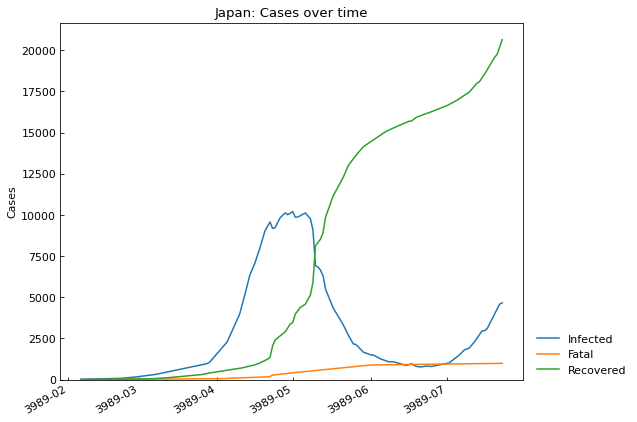

,Date,Confirmed,Infected,Fatal,Recovered
158,2020-07-18,24132,3781,985,19366
159,2020-07-19,24642,4081,985,19576
160,2020-07-20,25096,4354,985,19757
161,2020-07-21,25736,4593,988,20155
162,2020-07-22,26303,4663,989,20651


In [25]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

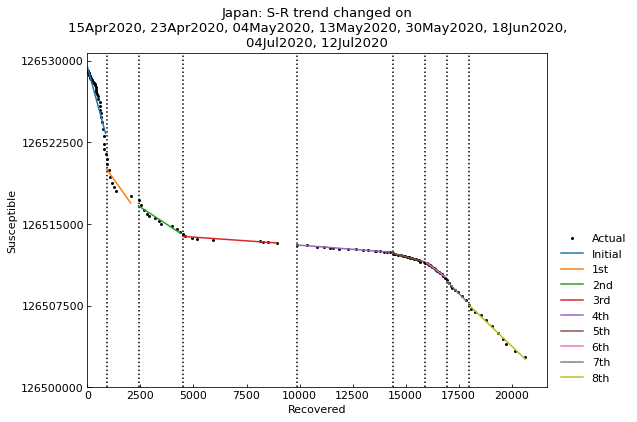

,Type,Start,End,Population
1st,Past,15Apr2020,22Apr2020,126529100
2nd,Past,23Apr2020,03May2020,126529100
3rd,Past,04May2020,12May2020,126529100
4th,Past,13May2020,29May2020,126529100
5th,Past,30May2020,17Jun2020,126529100
6th,Past,18Jun2020,03Jul2020,126529100
7th,Past,04Jul2020,11Jul2020,126529100
8th,Past,12Jul2020,22Jul2020,126529100


In [26]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [27]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	8th phase with SIR-F model finished 257 trials in 0 min 51 sec.

	2nd phase with SIR-F model finished 175 trials in 0 min 30 sec.

	1st phase with SIR-F model finished 355 trials in 1 min 1 sec.

	3rd phase with SIR-F model finished 87 trials in 0 min 15 sec.

	4th phase with SIR-F model finished 102 trials in 0 min 15 sec.

	5th phase with SIR-F model finished 103 trials in 0 min 10 sec.

	6th phase with SIR-F model finished 111 trials in 0 min 10 sec.

	7th phase with SIR-F model finished 65 trials in 0 min 5 sec.

Completed optimization. Total: 3 min 17 sec

In [28]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,15Apr2020,22Apr2020,126529100,SIR-F,0.017191,0.003161,0.020652,0.000070,480,5.21,0.021,4763,19,105,0.117274,355,1 min 1 sec
2nd,Past,23Apr2020,03May2020,126529100,SIR-F,0.010087,0.006455,0.083405,0.000180,480,1.39,0.083,1850,33,51,0.104186,175,0 min 30 sec
3rd,Past,04May2020,12May2020,126529100,SIR-F,0.004635,0.014245,0.129595,0.000545,480,0.27,0.130,611,71,23,0.146093,87,0 min 15 sec
4th,Past,13May2020,29May2020,126529100,SIR-F,0.004112,0.028833,0.133056,0.000557,480,0.12,0.133,598,81,11,0.038661,102,0 min 15 sec
5th,Past,30May2020,17Jun2020,126529100,SIR-F,0.014213,0.026367,0.003232,0.000309,480,0.53,0.003,1078,23,12,0.056773,103,0 min 10 sec
6th,Past,18Jun2020,03Jul2020,126529100,SIR-F,0.032239,0.022020,0.088837,0.000692,480,1.29,0.089,481,10,15,0.085972,111,0 min 10 sec
7th,Past,04Jul2020,11Jul2020,126529100,SIR-F,0.050040,0.021680,0.081139,0.000768,480,2.05,0.081,433,6,15,0.063915,65,0 min 5 sec
8th,Past,12Jul2020,22Jul2020,126529100,SIR-F,0.042155,0.022825,0.032174,0.000271,480,1.77,0.032,1230,7,14,0.081616,257,0 min 51 sec


### Accuracy of estimation

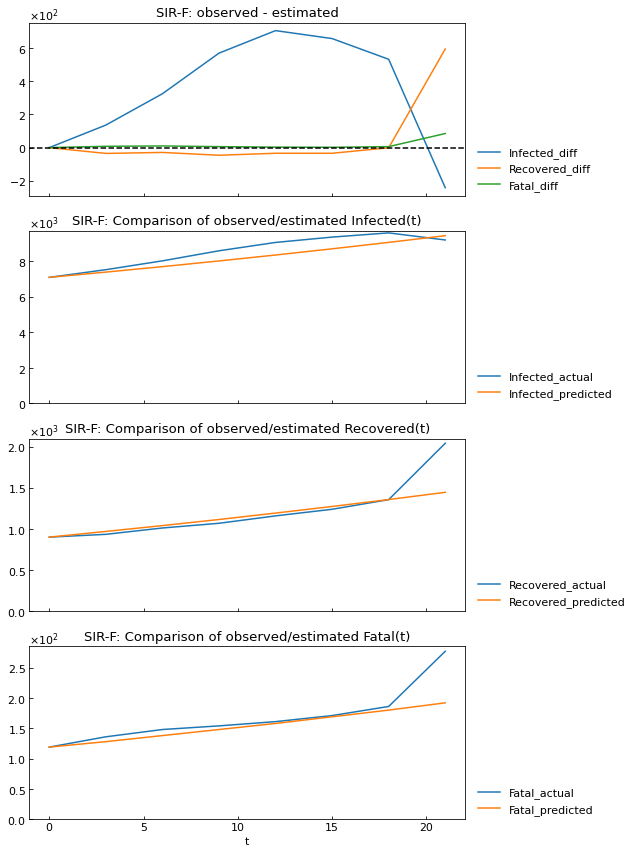

In [29]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [30]:
scenario.get("Rt", phase="4th")

0.12

### Show parameter history

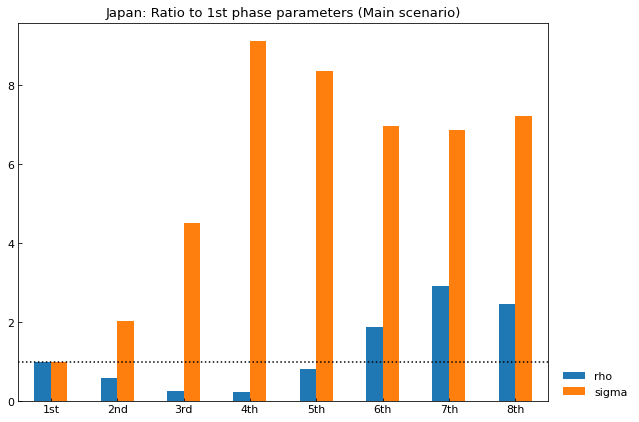

,1st,2nd,3rd,4th,5th,6th,7th,8th
rho,1.0,0.586744,0.269645,0.239178,0.826753,1.875333,2.910864,2.452155
sigma,1.0,2.042362,4.506940,9.122265,8.342197,6.966896,6.859201,7.221413


In [31]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

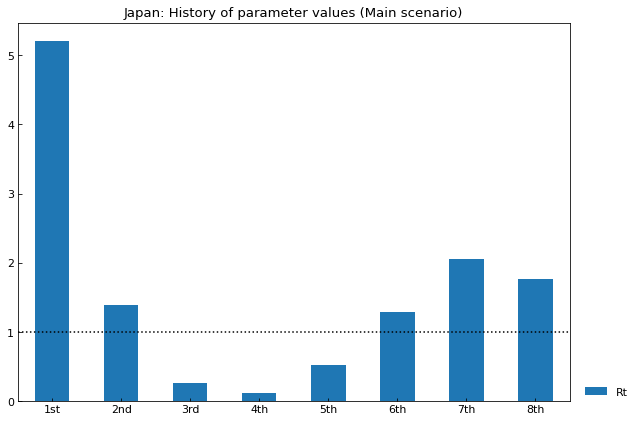

,1st,2nd,3rd,4th,5th,6th,7th,8th
Rt,5.21,1.39,0.27,0.12,0.53,1.29,2.05,1.77


In [32]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

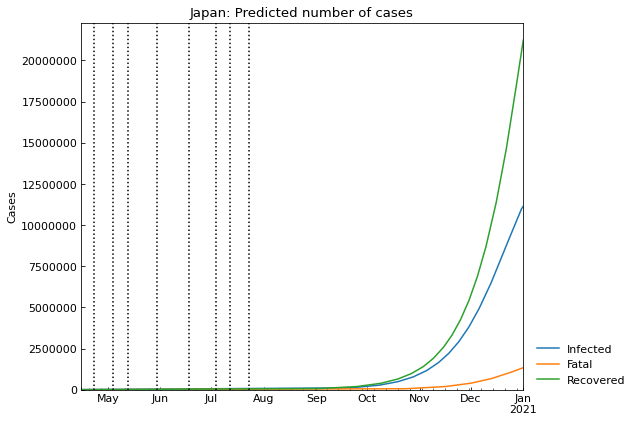

,Date,Fatal,Infected,Recovered,Susceptible
257,28Dec2020,1186360,10275802,18548732,96518204
258,29Dec2020,1226921,10521194,19260760,95520222
259,30Dec2020,1268087,10762016,19989426,94509569
260,31Dec2020,1309819,10997523,20734407,93487348
261,01Jan2021,1337916,11151444,21239366,92800373


In [33]:
scenario.clear(name="Main")
scenario.add(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [34]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.022824672847496463

In [35]:
sigma_new = sigma_current * 2
sigma_new

0.045649345694992925

In [36]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     1st      Past  15Apr2020  22Apr2020   126529100  SIR-F  0.017191   
         2nd      Past  23Apr2020  03May2020   126529100  SIR-F  0.010087   
         3rd      Past  04May2020  12May2020   126529100  SIR-F  0.004635   
         4th      Past  13May2020  29May2020   126529100  SIR-F  0.004112   
         5th      Past  30May2020  17Jun2020   126529100  SIR-F  0.014213   
         6th      Past  18Jun2020  03Jul2020   126529100  SIR-F  0.032239   
         7th      Past  04Jul2020  11Jul2020   126529100  SIR-F  0.050040   
         8th      Past  12Jul2020  22Jul2020   126529100  SIR-F  0.042155   
         9th    Future  23Jul2020  01Jan2021   126529100  SIR-F  0.042155   
Medicine 1st      Past  15Apr2020  22Apr2020   126529100  SIR-F  0.017191   
         2nd      Past  23Apr2020  03May2020   126529100  SIR-F  0.010087   
         3rd      Past  04May2020  12May2020   126529100  SIR-F  0.004635   
         4th      Past  13May2020  29May2020   126529100  SIR-F  0.004112   
         5th      Past  30May2020  17Jun2020   126529100  SIR-F  0.014213   
         6th      Past  18Jun2020  03Jul2020   126529100  SIR-F  0.032239   
         7th      Past  04Jul2020  11Jul2020   126529100  SIR-F  0.050040   
         8th      Past  12Jul2020  22Jul2020   126529100  SIR-F  0.042155   
         9th    Future  23Jul2020  22Aug2020   126529100  SIR-F  0.042155   
         10th   Future  23Aug2020  01Jan2021   126529100  SIR-F  0.042155   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     1st    0.003161  0.020652  0.000070  480  5.21       0.021   
         2nd    0.006455  0.083405  0.000180  480  1.39       0.083   
         3rd    0.014245  0.129595  0.000545  480  0.27       0.130   
         4th    0.028833  0.133056  0.000557  480  0.12       0.133   
         5th    0.026367  0.003232  0.000309  480  0.53       0.003   
         6th    0.022020  0.088837  0.000692  480  1.29       0.089   
         7th    0.021680  0.081139  0.000768  480  2.05       0.081   
         8th    0.022825  0.032174  0.000271  480  1.77       0.032   
         9th    0.022825  0.032174  0.000271  480  1.77       0.032   
Medicine 1st    0.003161  0.020652  0.000070  480  5.21       0.021   
         2nd    0.006455  0.083405  0.000180  480  1.39       0.083   
         3rd    0.014245  0.129595  0.000545  480  0.27       0.130   
         4th    0.028833  0.133056  0.000557  480  0.12       0.133   
         5th    0.026367  0.003232  0.000309  480  0.53       0.003   
         6th    0.022020  0.088837  0.000692  480  1.29       0.089   
         7th    0.021680  0.081139  0.000768  480  2.05       0.081   
         8th    0.022825  0.032174  0.000271  480  1.77       0.032   
         9th    0.022825  0.032174  0.000271  480  1.77       0.032   
         10th   0.045649  0.032174  0.000271  480  0.89       0.032   

                1/alpha2 [day]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     1st              4763            19            105   0.117274    355   
         2nd              1850            33             51   0.104186    175   
         3rd               611            71             23   0.146093     87   
         4th               598            81             11  0.0386609    102   
         5th              1078            23             12  0.0567735    103   
         6th               481            10             15  0.0859721    111   
         7th               433             6             15  0.0639148     65   
         8th              1230             7             14  0.0816161    257   
         9th              1230             7             14          -      -   
Medicine 1st     

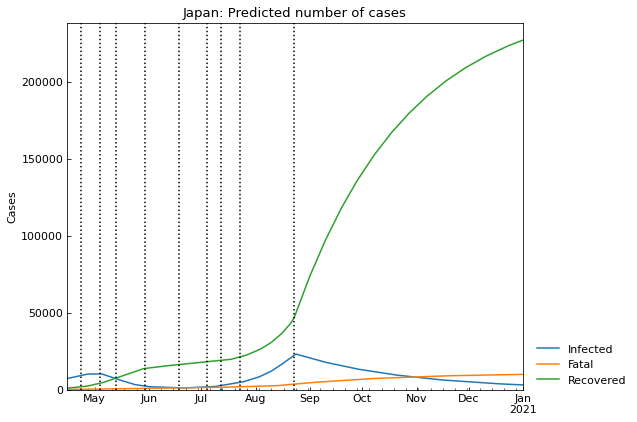

,Date,Fatal,Infected,Recovered,Susceptible
257,28Dec2020,9896,3271,225469,126290462
258,29Dec2020,9912,3220,225914,126290052
259,30Dec2020,9928,3170,226351,126289649
260,31Dec2020,9943,3121,226782,126289252
261,01Jan2021,9953,3089,227066,126288991


In [37]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [38]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 01Jan2021,Fatal on 01Jan2021
Main,11151444,01Jan2021,11151444,1337916
Medicine,23521,23Aug2020,3089,9953
